<a href="https://colab.research.google.com/github/guyez/NLP/blob/main/Distributed_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Setup

First of all, we need to import some useful packages that we will use during this hands-on session.

In [ ]:
# system packages
import os
import shutil
import sys

# data and numerical management packages
import pandas as pd
import numpy as np

# useful during debugging (progress bars)
from tqdm import tqdm

## Prepare a dataset for experiments

We will use the IMDB dataset of previous assignment. As you already know, it is a dataset of 50k sentences used for sentiment analysis. In particular, half of them (25k) is labelled as containing positive sentiment, whereas the remaining half are sentences of negative polarity.

### Download and extraction

We start by downloading the dataset and extract it to a folder.

In [ ]:
from urllib import request
import tarfile

# Config
print("Current work directory: {}".format(os.getcwd()))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

print(dataset_path)

def download_dataset(download_path, url):
    if not os.path.exists(download_path):
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")

def extract_dataset(download_path, extract_path):
    print("Extracting dataset... (it may take a while...)")
    with tarfile.open(download_path) as loaded_tar:
        loaded_tar.extractall(extract_path)
    print("Extraction completed!")

# Download
download_dataset(dataset_path, url)

# Extraction
extract_dataset(dataset_path, dataset_folder)


Current work directory: /content
/content/Datasets/Movies.tar.gz
Extracting dataset... (it may take a while...)
Extraction completed!


In [ ]:

# Config
dataset_name = "aclImdb"
debug = True

def encode_dataset(dataset_name, debug=True):
    dataframe_rows = []

    for split in tqdm(['train', 'test']):
        for sentiment in ['pos', 'neg']:
            folder = os.path.join(os.getcwd(), "Datasets", dataset_name, split, sentiment)
            for filename in os.listdir(folder):
                file_path = os.path.join(folder, filename)
                try:
                    if os.path.isfile(file_path):
                        # open the file
                        with open(file_path, mode='r', encoding='utf-8') as text_file:
                            # read it and extract informations
                            text = text_file.read()
                            score = filename.split("_")[1].split(".")[0]
                            file_id = filename.split("_")[0]

                            num_sentiment = -1

                            if sentiment == "pos" : num_sentiment = 1
                            elif sentiment == "neg" : num_sentiment = 0

                            # create single dataframe row
                            dataframe_row = {
                                "file_id": file_id,
                                "score": score,
                                "sentiment": num_sentiment,
                                "split": split,
                                "text": text
                            }

                            # print detailed info for the first file
                            if debug:
                                print(file_path)
                                print(filename)
                                print(file_id)
                                print(text)
                                print(score)
                                print(sentiment)
                                print(split)
                                print(dataframe_row)
                                debug = False
                            dataframe_rows.append(dataframe_row)

                except Exception as e:
                    print('Failed to process %s. Reason: %s' % (file_path, e))
                    sys.exit(0)

    folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
    if not os.path.exists(folder):
        os.makedirs(folder)

    # transform the list of rows in a proper dataframe
    df = pd.DataFrame(dataframe_rows)
    df = df[["file_id",
                        "score",
                        "sentiment",
                        "split",
                        "text"]]
    dataframe_path = os.path.join(folder, dataset_name + ".pkl")
    df.to_pickle(dataframe_path)

    return df


# Encoding
print("Encoding dataset...")
df = encode_dataset(dataset_name, debug)
print("Encoding completed!")

  0%|          | 0/2 [00:00<?, ?it/s]

Encoding dataset...
/content/Datasets/aclImdb/train/pos/3463_7.txt
3463_7.txt
3463
I am a big Beatles fan. My favorite Beatle is Paul and my least favorite is John. I already knew quite a bit about the Beatles music and the truth behind the breakup, as well as things like John Lennon's family and Paul's band Wings. I was curious to see how this movie would handle the relationship between John and Paul so many years after the breakup.<br /><br />I was not disappointed by this movie. Although the story itself is fiction, many of the references that the two musicians used were very accurate. These included how Yoko Ono would always be with John wherever he went, the Wings song "Silly Love Songs" being the number one hit that year and the concert on the roof of Apple Studios playing music from the album "Let It Be."<br /><br />The actors did a very good job in playing John and Paul. The accents could had used maybe a bit more work, but they seemed to act a lot like I've read the two former

100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


Encoding completed!


### Loading and Visualization

The next step is to load the dataset and inspect some of its elements in order to have an idea of the general content. We will use **pandas** library for dataset loading as follows.

In [ ]:
# Inspection

print("Dataset size: {}".format(df.shape)) # (50000, 5)
print("Dataset columns: {}".format(df.columns.values)) # ['file_id', 'score', 'sentiment', 'split', 'text]

print("Classes distribution:\n{}".format(df.sentiment.value_counts())) # [0: 25000, 1: 25000]

print("Some examples: {}".format(df.iloc[:5]))

Dataset size: (50000, 5)
Dataset columns: ['file_id' 'score' 'sentiment' 'split' 'text']
Classes distribution:
1    25000
0    25000
Name: sentiment, dtype: int64
Some examples:   file_id score  ...  split                                               text
0    3463     7  ...  train  I am a big Beatles fan. My favorite Beatle is ...
1    6958     7  ...  train  Of those comments here before mine, I mostly a...
2   11188    10  ...  train  I am a big fan of Stephen King's work, and thi...
3    5038    10  ...  train  What a real treat and quite unexpected. This i...
4    8880     8  ...  train  Of life in (some) colleges. Of course there we...

[5 rows x 5 columns]


In [ ]:
print("Dataframe structure:")
print(df)
print()

print("Total rows %d" % (len(df)))
print()

column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()


Dataframe structure:
      file_id score  ...  split                                               text
0        3463     7  ...  train  I am a big Beatles fan. My favorite Beatle is ...
1        6958     7  ...  train  Of those comments here before mine, I mostly a...
2       11188    10  ...  train  I am a big fan of Stephen King's work, and thi...
3        5038    10  ...  train  What a real treat and quite unexpected. This i...
4        8880     8  ...  train  Of life in (some) colleges. Of course there we...
...       ...   ...  ...    ...                                                ...
49995    8843     4  ...   test  Although this starts out promisingly, a woman ...
49996    9823     4  ...   test  Hellboy revolves around classic comic book/act...
49997   10499     1  ...   test  A friend of mine showed me this film yesterday...
49998    1837     2  ...   test  Firstly, this movie works in the fact that it ...
49999    9965     1  ...   test  This has got to be the most god-a

### A quick simplification

Since the dataset is quite large, the embedding related methods, such as co-occurrence matrix construction, may take a while or may require ad hoc solutions. For instance, if we consider the whole dataset (50k sentences) the vocabulary should be around 160k terms and we don't have sufficient memory to load a (160k, 160k) co-occurrence matrix.

In [ ]:
samples_amount = 500

np.random.seed(42)
random_indexes = np.random.choice(np.arange(df.shape[0]),
                                  size=samples_amount,
                                  replace=False)

df = df.iloc[random_indexes]

print('New dataset size: ', df.shape)

New dataset size:  (500, 5)


## Building the Vocabulary



### Some Cleaning

In [ ]:
import re
from functools import reduce
import nltk
from nltk.corpus import stopwords

# Config

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text):
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text):
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def filter_out_uncommon_symbols(text):
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text):
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text):
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()


def remove_html_tags(text):
    """
    Removes any html tag from text.
    Example:
    Input: '<br>  This assignment is cool <br>'
    Output: 'This assignment is cool'
    """
    return  re.sub('<[^>]*>', '', text)

PREPROCESSING_PIPELINE = [
                          lower,
                          remove_html_tags,
                          replace_special_characters,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

# Anchor method

def text_prepare(text, filter_methods=None):
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE

    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')

print()
print('[Debug] Before:\n{}'.format(df.text[:3]))
print()

# Replace each sentence with its pre-processed version
df['text'] = df['text'].apply(lambda txt: text_prepare(txt))

print('[Debug] After:\n{}'.format(df.text[:3]))
print()

print("Pre-processing completed!")

Pre-processing text...

[Debug] Before:
33553    <br /><br />eXistenZ is simply David Cronenber...
9427     A true classic. Beautifully filmed and acted. ...
199      Low budget Brit pop melodrama focuses on a gir...
Name: text, dtype: object

[Debug] After:
33553    existenz simply david cronenbergs best movie p...
9427     true classic beautifully filmed acted reveals ...
199      low budget brit pop melodrama focuses girl wan...
Name: text, dtype: object

Pre-processing completed!


### **Vocabulary Creation**

In [ ]:
nltk.download('punkt')
from collections import OrderedDict
from nltk import word_tokenize 

# Function definition
def build_vocabulary(df):
    """
    Given a dataset, builds the corresponding word vocabulary.

    :param df: dataset from which we want to build the word vocabulary (pandas.DataFrame)
    :return:
      - word vocabulary: vocabulary index to word
      - inverse word vocabulary: word to vocabulary index
      - word listing: set of unique terms that build up the vocabulary
    """
    ### YOUR CODE HERE ###
    text = ' '.join(df['text'].values)
    text = word_tokenize(text)

    # Note that this instruction returns the SORTED unique values.
    word_listing = set(text)
    index_list = list(range(0, len(word_listing)))

    idx_to_word = dict(zip(index_list, word_listing))
    word_to_idx = dict(zip(word_listing, index_list)) 
    

    return idx_to_word, word_to_idx, word_listing
 

idx_to_word, word_to_idx, word_listing = build_vocabulary(df)

In [ ]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items_idx_to_word = take(10, idx_to_word.items())
n_items_word_to_idx = take(10, word_to_idx.items())
n_items_word_listing = list(word_listing)[:10]

print('First 10 words')
print(n_items_word_listing)
print()

print('Word vocabulary')
print(n_items_idx_to_word)
print()

print('Inverse word vocabulary')
print(n_items_word_to_idx)
print()

print('Most common words')
nltk.FreqDist(' '.join(df['text'].values).split()).most_common(50)

## Building the Co-occurence Matrix


In [ ]:
import scipy.sparse    # defines several types of efficient sparse matrices
import zipfile
import gc
import requests
import time

# Function definition

def co_occurrence_count(df, idx_to_word, word_to_idx, window_size=4):
    """
    Builds word-word co-occurrence matrix based on word counts.

    :param df: pre-processed dataset (pandas.DataFrame)
    :param idx_to_word: vocabulary map (index -> word) (dict)
    :param word_to_idx: vocabulary map (word -> index) (dict)

    :return
      - co_occurrence symmetric matrix of size |V| x |V| (|V| = vocabulary size)
    """

    length = len(idx_to_word)

    co_occurrence_matrix = scipy.sparse.lil_matrix((length,length))

    for review in df['text']:
      review = word_tokenize(review)
      for i,word in enumerate(review):
         for j in range(max(i-window_size,0),min(i+window_size,len(review))):
           if word != review[j]:
             co_occurrence_matrix[word_to_idx[word], word_to_idx[review[j]]] += 1
             co_occurrence_matrix[word_to_idx[review[j]], word_to_idx[word]] += 1
             
    return co_occurrence_matrix


# Testing
window_size = 4

# Clean RAM before re-running this code snippet to avoid session crash
if 'co_occurrence_matrix' in globals():
    del co_occurrence_matrix
    gc.collect()
    time.sleep(10.)

print("Building co-occurrence count matrix... (it may take a while...)")
co_occurrence_matrix = co_occurrence_count(df, idx_to_word, word_to_idx, window_size)
print("Building completed!")

## Embedding Visualization

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Function definition

def visualize_embeddings(embeddings, word_annotations=None, word_to_idx=None):
    """
    Plots given reduce word embeddings (2D).
    Users can highlight specific words (word_annotations list) in order to better
    analyse the effectiveness of the embedding method.

    :param embeddings: word embedding matrix of shape (words, 2) retrieved via a
                       dimensionality reduction technique.
    :param word_annotations: list of words to be annotated.
    :param word_to_idx: vocabulary map (word -> index) (dict)
    """

    fig, ax = plt.subplots(1, 1, figsize=(15, 12))

    if word_annotations:
        print("Annotating words: {}".format(word_annotations))

        word_indexes = []
        for word in word_annotations:
            word_index = word_to_idx[word]
            word_indexes.append(word_index)

        word_indexes = np.array(word_indexes)

        other_embeddings = embeddings[np.setdiff1d(np.arange(embeddings.shape[0]), word_indexes)]
        target_embeddings = embeddings[word_indexes]

        ax.scatter(other_embeddings[:, 0], other_embeddings[:, 1], alpha=0.1, c='blue')
        ax.scatter(target_embeddings[:, 0], target_embeddings[:, 1], alpha=1.0, c='red')
        ax.scatter(target_embeddings[:, 0], target_embeddings[:, 1], alpha=1, facecolors='none', edgecolors='r', s=1000)

        for word, word_index in zip(word_annotations, word_indexes):
            word_x, word_y = embeddings[word_index, 0], embeddings[word_index, 1]
            ax.annotate(word, xy=(word_x, word_y))

    else:
        ax.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.1, c='blue')

    # Set proper axis limit range
    # We avoid outliers ruining the visualization if they are quite far away
    xmin_quantile = np.quantile(embeddings[:, 0], q=0.01)
    xmax_quantile = np.quantile(embeddings[:, 0], q=0.99)

    ymin_quantile = np.quantile(embeddings[:, 1], q=0.01)
    ymax_quantile = np.quantile(embeddings[:, 1], q=0.99)

    ax.set_xlim(xmin_quantile, xmax_quantile)
    ax.set_ylim(ymin_quantile, ymax_quantile)


def reduce_SVD(embeddings):
    """
    Applies SVD dimensionality reduction.

    :param embeddings: word embedding matrix of shape (words, dim). In the case
                       of a word-word co-occurrence matrix the matrix shape would
                       be (words, words).

    :return
        - 2-dimensional word embedding matrix of shape (words, 2)
    """
  
    print("Running SVD reduction method...")
    svd = TruncatedSVD(n_components=2, n_iter=10, random_state=42)
    reduced = svd.fit_transform(embeddings)
    print("SVD reduction completed!")

    return reduced

# Note: this method may take a while
def reduce_tSNE(embeddings):
    """
    Applies t-SNE dimensionality reduction.

    :param embeddings: word embedding matrix of shape (words, dim). In the case
                       of a word-word co-occurrence matrix the matrix shape would
                       be (words, words).

    :return
        - 2-dimensional word embedding matrix of shape (words, 2)
    """

    print("Running t-SNE reduction method... (it may take a while...)")
    tsne = TSNE(n_components=2, random_state=42, n_iter=1000, metric='cosine', n_jobs=2)
    reduced = tsne.fit_transform(embeddings)
    print("t-SNE reduction completed!")
    print(reduced.shape)

    return reduced

# SVD
reduced_SVD = reduce_SVD(co_occurrence_matrix)
visualize_embeddings(reduced_SVD, ['good', 'love', 'beautiful'], word_to_idx)

# t-SNE
# Note: this method may take a while (just relax :-))
%time reduced_tSNE = reduce_tSNE(co_occurrence_matrix)
visualize_embeddings(reduced_tSNE, ['good', 'love', 'beautiful'], word_to_idx)

plt.show()

Feel free to play with visualization!

In [ ]:
test_words = ['film','films','movie','movies','drama',
 'comedy','love','like','man','actor','woman',
 'actress','good','bad','white','black','beautiful',
 'ugly','dad','mom','uk','london','spain']

Annotating words: ['film', 'films', 'movie', 'movies', 'drama', 'comedy', 'love', 'like', 'man', 'actor', 'woman', 'actress', 'good', 'bad', 'white', 'black', 'beautiful', 'ugly', 'dad', 'mom', 'uk', 'london', 'spain']


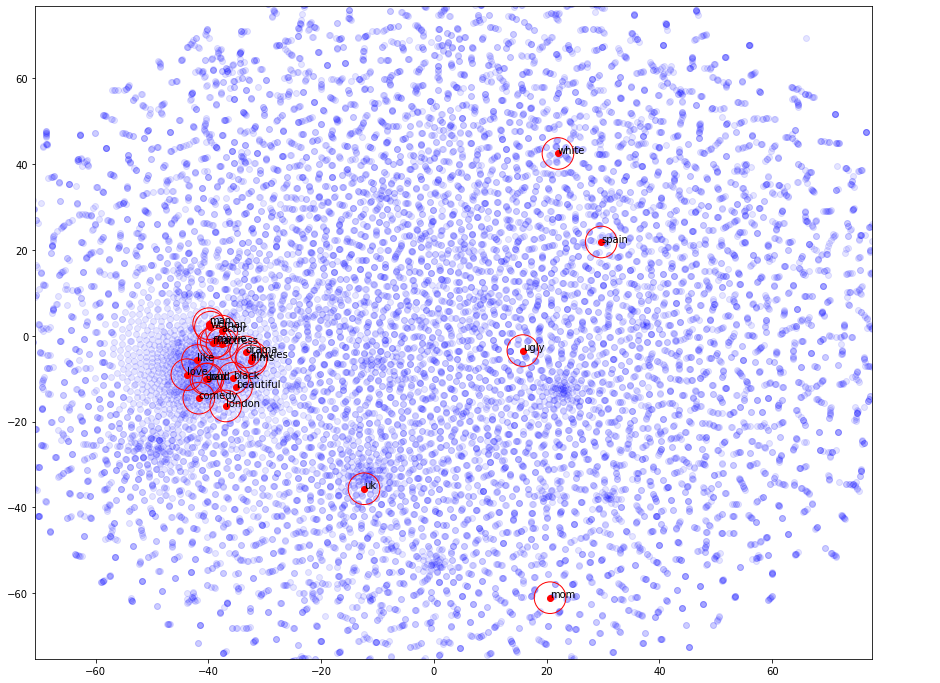

In [ ]:
#visualize_embeddings(reduced_SVD, test_words, word_to_idx)
visualize_embeddings(reduced_tSNE, test_words, word_to_idx)

### Embedding properties

Visualization can give us a rough idea of how word embeddings are organized and if some semantic properties are reflected in the numerical dimensional space. For example, are synonyms close together? Ideally, if the dataset is big enough, we should see similar vector embeddings since synonyms usually have similar contexts.

**How to do that?** We could highlight target words in the visualization step and check if our expectations are met. For instance, synonyms should be close together. However, this method is rather inaccurate and time-consuming (dimensionality reduction is not a perfect mapping). Thus, we need some sort of similarity metric that is independent of the vector dimensionality.

#### **Cosine Similarity**

Let us now consider again the matrix obtained using <code>co_occurrence_count</code>. 
Since we want to meaure how two word vectors are far apart, a naive solution would involve computing the dot product of the two vectors. However, this metric will give higher similarity either to longer vectors or to vectors that have higher counts.

A better metric is **cosine similarity** which is just a normalized dot product.

$s(p, q) = \frac{p \, \cdot \, q}{||p|| \, \cdot \, ||q||}$

where $s(p, q) \in [-1, 1] $, since it computes the cosine of the angle between the two vectors. Intuitively, we are bringing vectors down to the d-dimensional unit sphere (d is the vocab size) and then computing their distance (in 2D space we will have a circle).

In [ ]:
from sklearn.preprocessing import normalize

# Function definition

def cosine_similarity(p, q, transpose_p=False, transpose_q=False):
    """
    Computes the cosine similarity of two d-dimensional matrices

    :param p: d-dimensional vector (np.ndarray) of shape (p_samples, d)
    :param q: d-dimensional vector (np.ndarray) of shape (q_samples, d)
    :param transpose_p: whether to transpose p or not
    :param transpose_q: whether to transpose q or not

    :return
        - cosine similarity matrix S of shape (p_samples, q_samples)
          where S[i, j] = s(p[i], q[j])
    """

    # If it is a vector, consider it as a single sample matrix
    if len(p.shape) == 1:
        p = p.reshape(1, -1)
    if len(q.shape) == 1:
        q = q.reshape(1, -1)

    p_normalized = normalize(p)
    if transpose_p:
      p_normalized = p_normalized.T
    
    q_normalized = normalize(q)
    if transpose_q:
      q_normalized = q_normalized.T

    similarity_matrix = p_normalized @ q_normalized

    if (hasattr(similarity_matrix, "toarray")):
        return similarity_matrix.toarray()
        
    return similarity_matrix

# Testing

print("Computing similarity matrix...")
similarity_matrix = cosine_similarity(co_occurrence_matrix,
                                      co_occurrence_matrix,
                                      transpose_q=True)
print("Similarity completed!")


#### **Synonyms and Antonyms**

In [ ]:
synonyms_cosine = cosine_similarity(co_occurrence_matrix[word_to_idx['film']],
                  co_occurrence_matrix[word_to_idx['movie']],
                  transpose_q=True)[0][0]
print('Synonyms: film, movie')
print("Cosine similarity: {:0.4f}".format(synonyms_cosine))
print()

antonyms_cosine = cosine_similarity(co_occurrence_matrix[word_to_idx['drama']],
                  co_occurrence_matrix[word_to_idx['comedy']],
                  transpose_q=True)[0][0]
print('Antonyms: drama, comedy')
print("Cosine similarity: {:0.4f}".format(antonyms_cosine))
print()

synonym_antonym_cosine = cosine_similarity(co_occurrence_matrix[word_to_idx['love']],
                  co_occurrence_matrix[[word_to_idx['like'], word_to_idx['hate']]],
                  transpose_q=True )[0]
print('Synonym-Antonym: love, like, hate')
print("Cosine similarity: {:0.4f}(love, like), {:0.4f}(love, hate)".format(synonym_antonym_cosine[0], synonym_antonym_cosine[1]))

Synonyms: film, movie
Cosine similarity: 0.8097

Antonyms: drama, comedy
Cosine similarity: 0.1753

Synonym-Antonym: love, like, hate
Cosine similarity: 0.5910(love, like), 0.3777(love, hate)


#### **Analogies**

In [ ]:
def get_top_K_indexes(data, K):
    """
    Returns the top K indexes of a 1-dimensional array (descending order)
    Example:
        data = [0, 7, 2, 1]
        best_indexes:
        K = 1 -> [1] (data[1] = 7)
        K = 2 -> [1, 2]
        K = 3 -> [1, 2, 3]
        K = 4 -> [1, 2, 3, 4]

    :param data: 1-d dimensional array
    :param K: number of highest value elements to consider

    :return
        - array of indexes corresponding to elements of highest value
    """
    best_indexes = np.argsort(data, axis=0)[::-1]
    best_indexes = best_indexes[:K]

    return best_indexes

def get_top_K_word_ranking(embedding_matrix, idx_to_word, word_to_idx,
                           positive_listing, negative_listing, K):
    """
    Finds the top K most similar words following this reasoning:
        1. words that have highest similarity to words in positive_listing
        2. words that have highest distance to words in negative_listing
    
    Positive and negative listing can be defined accordingly to a given analogy
    Example:
        
        man : king :: woman : x
    
    positive_listing = ['king', 'woman']
    negative_listing = ['man']

    This is equivalent to: compute king - man + woman, and then find the
    most similar candidate.
    
    :param embedding_matrix: embedding matrix of shape (words, embedding dimension).
    Note that in the case of a co-occurrence matrix, the shape is (words, words).
    :param idx_to_word: vocabulary map (index -> word) (dict)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param positive_listing: list of words that should have high similarity with
                             top K retrieved ones.
    :param negative_listing: list of words that should have high distance to
                             top K retrieved ones.
    :param K: number of best word matches to consider

    :return
        - top K word matches according to aforementioned criterium
        - similarity values of top K word matches according to aforementioned
          criterium
    """


    # Positive words (similarity)
    positive_indexes = np.array([word_to_idx[word] for word in positive_listing])
    word_positive_vector = np.sum(embedding_matrix[positive_indexes, :], axis=0)

    # Negative words (distance)
    negative_indexes = np.array([word_to_idx[word] for word in negative_listing])
    word_negative_vector = np.sum(embedding_matrix[negative_indexes, :], axis=0)

    # Find candidate words
    target_vector = (word_positive_vector - word_negative_vector) / (len(positive_listing) + len(negative_listing))
    total_indexes = np.concatenate((positive_indexes, negative_indexes))
    valid_indexes = np.setdiff1d(np.arange(similarity_matrix.shape[0]), total_indexes)
    candidate_vectors = embedding_matrix[valid_indexes]

    candidate_similarities = cosine_similarity(candidate_vectors, target_vector, transpose_q=True)
    candidate_similarities = candidate_similarities.ravel()

    relative_indexes = get_top_K_indexes(candidate_similarities, K)
    top_K_indexes = valid_indexes[relative_indexes]
    top_K_words = [idx_to_word[idx] for idx in top_K_indexes]

    return top_K_words, candidate_similarities[relative_indexes]


In [ ]:
# Example analogy: tv : episodes :: film : x
# positive listing -> [episodes, film]
# negative listing ->  [tv]

K = 5

print('Good analogy, film : films :: movie : x')
top_K_words, top_K_values = get_top_K_word_ranking(co_occurrence_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['films', 'movie'],
                                                   ['film'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)


print()

print('Bad analogy, man : actor :: woman : x')
top_K_words, top_K_values = get_top_K_word_ranking(co_occurrence_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['actor', 'woman'],
                                                   ['man'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)


#### **Bias**

In [ ]:
K = 5

print('Bias, woman : bad :: man : x')

print()

top_K_words, top_K_values = get_top_K_word_ranking(co_occurrence_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['bad', 'man'],
                                                   ['woman'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

print()

print('Unbias, white : beautiful :: black : x')

print()

top_K_words, top_K_values = get_top_K_word_ranking(co_occurrence_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['beautiful', 'black'],
                                                   ['white'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

## Better sparse word embeddings

Until now we've played with the most basic type of word encoding, that is count-based co-occurrence matrix. However, there are better ways to encode words.

In particular, we will explore positive pointwise mutual information (PPMI) weighting technique.

### PPMI

Pointwise mutual information (PMI) is a weighting technique, just like tf-dif, that gives more weight to word pairs based on how often they occur within the same context window that we would have expected them to appear by chance.

$PMI(w1, w2) = \log_2 \frac{P(w1, w2)}{P(w1)P(w2)}$

PMI value range is $[-\infty, \infty]$, but negative values are a bit tricky, unless we have a very big corpus. Thus, it is more common to replace all negative PMI values with zero.

$PPMI(w1, w2) = \max(\log_2 \frac{P(w1, w2)}{P(w1)P(w2)}, 0)$

Now, it's your turn to weight the count-based co-occurrence matrix with PPMI technique.

**PPMI Memo**: 
Given a co-occurrence matrix C of shape (N, M), we can turn it into a PPMI matrix as follows:

$p_{i,j} = \frac{C_{i, j}}{\sum_{i=1}^N \sum_{j=1}^M C_{i,j}}$

$p_{i,*} = \frac{\sum_{j=1}^M C_{i, j}}{\sum_{i=1}^N \sum_{j=1}^M C_{i,j}}$

$p_{*,j} = \frac{\sum_{i=1}^N C_{i, j}}{\sum_{i=1}^N \sum_{j=1}^M C_{i,j}}$

$PPMI_{i, j} = \max(\log_2 \frac{p_{i, j}}{p_{i, *} \, p_{*, j}}, 0)$

In [ ]:
# Function definition

def convert_ppmi(co_occurrence_matrix):
    """
    Converts a count-based co-occurrence matrix to a PPMI matrix

    :param co_occurrence_matrix: count based co-occurrence matrix of shape (|V|, |V|)
    
    :return
        - PPMI co-occurrence matrix of shape (|V|, |V|)
    """
    cols = co_occurrence_matrix.sum(axis=0)
    rows = co_occurrence_matrix.sum(axis=1)
    total = cols.sum()
    expected = np.outer(rows, cols) / total
    ppmi_occurrence_matrix = co_occurrence_matrix / expected

    with np.errstate(divide='ignore'):
        ppmi_occurrence_matrix = np.log2(ppmi_occurrence_matrix)
        
    ppmi_occurrence_matrix[np.isinf(ppmi_occurrence_matrix) ] = 0.0 
    ppmi_occurrence_matrix[ppmi_occurrence_matrix < 0 ] = 0.0 
    return ppmi_occurrence_matrix

# Testing

print("Computing PPMI co-occurrence matrix...")
ppmi_occurrence_matrix = convert_ppmi(co_occurrence_matrix)
print("PPMI completed!")

### Visualization (cont'd)

Let's see if these weighting techniques have brought some change at visualization level!

Pick a dimensionality reduction technique and explore the new embedding space.

In [ ]:
### YOUR CODE HERE ###
# SVD
reduced_SVD = reduce_SVD(ppmi_occurrence_matrix)

# t-SNE
# Note: this method may take a while (just relax :-))
%time reduced_tSNE = reduce_tSNE(ppmi_occurrence_matrix)

Running SVD reduction method...
SVD reduction completed!
Running t-SNE reduction method... (it may take a while...)
t-SNE reduction completed!
(14036, 2)
CPU times: user 9min 37s, sys: 7.06 s, total: 9min 45s
Wall time: 5min 1s


Annotating words: ['film', 'films', 'movie', 'movies', 'drama', 'comedy', 'love', 'like', 'man', 'actor', 'woman', 'actress', 'good', 'bad', 'white', 'black', 'beautiful', 'ugly', 'dad', 'mom', 'uk', 'london', 'spain']


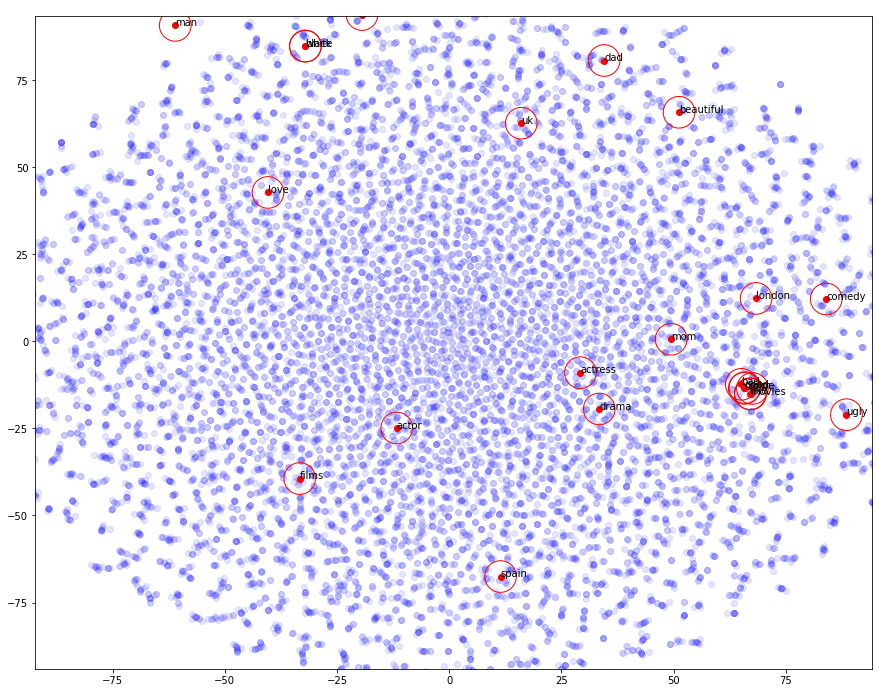

In [ ]:
### YOUR CODE HERE ###
#visualize_embeddings(reduced_SVD, test_words, word_to_idx)
visualize_embeddings(reduced_tSNE, test_words, word_to_idx)

### Embedding properties

In [ ]:
synonyms_cosine = cosine_similarity(ppmi_occurrence_matrix[word_to_idx['film']],
                  ppmi_occurrence_matrix[word_to_idx['movie']],
                  transpose_q=True)[0][0]
print('Synonyms: film, movie')
print("Cosine similarity: {:0.4f}".format(synonyms_cosine))
print()

antonyms_cosine = cosine_similarity(ppmi_occurrence_matrix[word_to_idx['comedy']],
                  ppmi_occurrence_matrix[word_to_idx['drama']],
                  transpose_q=True)[0][0]
print('Antonyms: drama, comedy')
print("Cosine similarity: {:0.4f}".format(antonyms_cosine))
print()

synonym_antonym_cosine = cosine_similarity(ppmi_occurrence_matrix[word_to_idx['love']],
                  ppmi_occurrence_matrix[[word_to_idx['like'], word_to_idx['hate']]],
                  transpose_q=True )[0]
print('Synonym-Antonym: love, like, hate')
print("Cosine similarity: {:0.4f}(love, like), {:0.4f}(love, hate)".format(synonym_antonym_cosine[0], synonym_antonym_cosine[1]))

Synonyms: film, movie
Cosine similarity: 0.0987

Antonyms: drama, comedy
Cosine similarity: 0.0775

Synonym-Antonym: love, like, hate
Cosine similarity: 0.0382(love, like), 0.0489(love, hate)


#Dense embeddings

Until now we've worked with sparse embedding methods, which lead to high dimensional word embeddings (dimension equal to |V|). The main drawback of such approach is that words belong to separate dimensions. Thus, in order to check if two words have similar contexts we need to have a large corpus available.

To this end, we might prefer a dense embedding technique, such that all words are encoded to high dimensional space, much smaller than |V| (generally up to $\sim$ 1000). A dense representation is also convenient from a machine learning point of view: we have fewer parameters to learn and, thus, models are less prone to overfitting. Moreover, words do not belong to separate dimensions anymore and semantic relationships are easily modelled.

In this section, we will experiment with pre-trained dense embedding models and compare them to previously described sparse methods.

## Working with a pre-trained model

The first step consists in choosing and downloading a pre-trained embedding model. For the purpose of this assignment, we limit to classic models, such as Word2Vec and GloVe.

### Download embedding model

Downloading a pre-trained embedding model is quite simple to due existing ad hoc wrappers. In particular, we will use [Gensim](https://radimrehurek.com/gensim/) library for both embedding models as follows.

In [ ]:
import gensim
import gensim.downloader as gloader

def load_embedding_model(model_type, embedding_dimension=50):
    """
    Loads a pre-trained word embedding model via gensim library.

    :param model_type: name of the word embedding model to load.
    :param embedding_dimension: size of the embedding space to consider

    :return
        - pre-trained word embedding model (gensim KeyedVectors object)
    """

    download_path = ""

    # Find the correct embedding model name
    if model_type.strip().lower() == 'word2vec':
        download_path = "word2vec-google-news-300"

    elif model_type.strip().lower() == 'glove':
        download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)

    else:
        raise AttributeError("Unsupported embedding model type! Available ones: word2vec, glove")

    # Check download
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Invalid embedding model name! Check the embedding dimension:")
        print("Word2Vec: 300")
        print("Glove: 50, 100, 200, 300")
        raise e

    return emb_model


# Modify these variables as you wish!
# Glove -> 50, 100, 200, 300
# Word2Vec -> 300
embedding_model_type = "glove"
embedding_dimension = 50

embedding_model = load_embedding_model(embedding_model_type, embedding_dimension)
        

### Out of vocabulary (OOV) words

Before evaluating pre-trained dense word embeddings, it is good practice to check if the model is consistent with our dataset. To do so, we check the number of out-of-vocabulary (OOV) terms.

If the OOV amount is negligible, we can just keep going. On the other hand, we might want to handle OOV terms by assigning them a specific word vector.

In [ ]:
# Function definition

def check_OOV_terms(embedding_model, word_listing):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """

    oov_terms = word_listing - embedding_model.vocab.keys()
    return oov_terms


oov_terms = check_OOV_terms(embedding_model, word_listing)

print("Total OOV terms: {0} ({1:.2f}%)".format(len(oov_terms), float(len(oov_terms)) / len(word_listing)))


Total OOV terms: 1962 (0.14%)


### Handling OOV words

In [ ]:
# Function definition

def get_oov_embedding(oov_word, embedding_model, embedding_dimension, word_to_idx, idx_to_word, oov_terms, co_occurrence_count_matrix, neighbours_mean):
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param oov_word: out of vocabulary word (string)
    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param idx_to_word: vocabulary map (index -> word) (dict)
    :param oov_terms: list of OOV terms (list)
    :param co_occorruence_count_matrix: the co-occurrence count matrix of the given dataset (window size 1)
    :param neighbours_mean: a flag, if set to true enable the neighbours mean strategy (boolean)

    :return
        - oov_word embedding that assigns a high dimensional vector to the oov word
    """
 
  if neighbours_mean:
    oov_word_embedding = []
    adjacent = co_occurrence_count_matrix[word_to_idx[oov_word],:].rows[0]
    for index in adjacent:
      if idx_to_word[index] not in oov_terms:
        oov_word_embedding.append(embedding_model[idx_to_word[index]])
    # If no adjacent word was found return a random embedding vector
    if not oov_word_embedding:
      oov_word_embedding =   np.random.normal(embedding_dimension)
    else:
      oov_word_embedding =  np.mean(oov_word_embedding, axis = 0)

  else:
    oov_word_embedding = np.random.normal(embedding_dimension)

  return oov_word_embedding



def build_embedding_matrix(embedding_model, embedding_dimension, word_to_idx, idx_to_word, oov_terms, co_occurrence_count_matrix, neighbours_mean = False):
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
     :param idx_to_word: vocabulary map (index -> word) (dict)
    :param oov_terms: list of OOV terms (list)
    :param co_occorruence_count_matrix: the co-occurrence count matrix of the given dataset (window size 1)
    :param neighbours_mean: a flag, if set to true enable the neighbours mean strategy (boolean)

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    length = len(word_to_idx)
    embedding_matrix = scipy.sparse.lil_matrix((length,embedding_dimension))
    for word in word_to_idx:
      if word not in oov_terms:
        embedding_matrix[word_to_idx[word]] = embedding_model[word]
      else:
        embedding_matrix[word_to_idx[word]] = get_oov_embedding(word, embedding_model, embedding_dimension, word_to_idx, idx_to_word, oov_terms, co_occurrence_count_matrix, neighbours_mean)

    return embedding_matrix

# Testing
co_occurrence_count_matrix = co_occurrence_count(df, idx_to_word, word_to_idx, window_size=1)
embedding_matrix = build_embedding_matrix(embedding_model, embedding_dimension, word_to_idx, idx_to_word, oov_terms, co_occurrence_count_matrix)
print("Embedding matrix shape: {}".format(embedding_matrix.shape))


Embedding matrix shape: (14036, 50)


## Embedding visualization

We are now ready to visualize pre-trained word embeddings!

In [ ]:
### YOUR CODE HERE ###
# SVD
reduced_SVD = reduce_SVD(embedding_matrix)
# t-SNE
# Note: this method may take a while (just relax :-))
%time reduced_tSNE = reduce_tSNE(embedding_matrix)

Running SVD reduction method...
SVD reduction completed!
Running t-SNE reduction method... (it may take a while...)
t-SNE reduction completed!
(14036, 2)
CPU times: user 5min 2s, sys: 1.12 s, total: 5min 3s
Wall time: 2min 39s


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Annotating words: ['film', 'films', 'movie', 'movies', 'drama', 'comedy', 'love', 'like', 'man', 'actor', 'woman', 'actress', 'good', 'bad', 'white', 'black', 'beautiful', 'ugly', 'dad', 'mom', 'uk', 'london', 'spain']


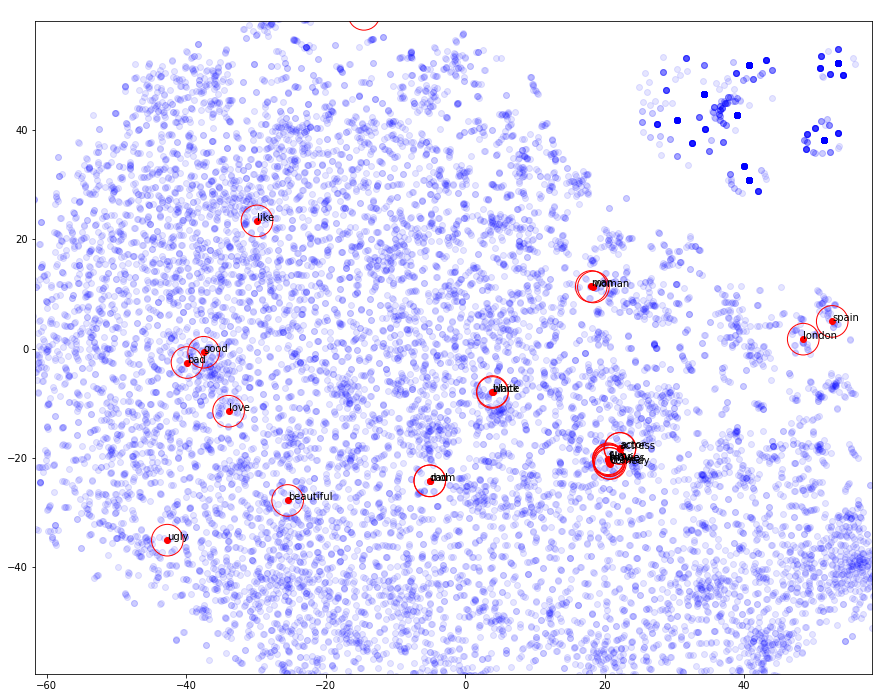

In [ ]:
#visualize_embeddings(reduced_SVD, test_words, word_to_idx)
visualize_embeddings(reduced_tSNE, test_words, word_to_idx)

##Embedding properties

In [ ]:
K = 5

print('Good analogies')

print()

print('Example 1, film : films :: movie : x')
top_K_words, top_K_values = get_top_K_word_ranking(embedding_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['films', 'movie'],
                                                   ['film'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

print()

print('Example 2, man : actor :: woman : x')
top_K_words, top_K_values = get_top_K_word_ranking(embedding_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['actor', 'woman'],
                                                   ['man'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

print()

print('Example 3, man : dad :: woman : x')
top_K_words, top_K_values = get_top_K_word_ranking(embedding_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['dad', 'woman'],
                                                   ['man'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

print()

print('Example 4, uk : london :: spain : x')
top_K_words, top_K_values = get_top_K_word_ranking(embedding_matrix,
                                                   idx_to_word,
                                                   word_to_idx,
                                                   ['london', 'spain'],
                                                   ['uk'],
                                                   K)
print('Top K words: ', top_K_words)
print('Top K values: ', top_K_values)

print()

Good analogies

Example 1, film : films :: movie : x
Top K words:  ['movies', 'hollywood', 'comedies', 'animated', 'comedy']
Top K values:  [0.96994815 0.83414923 0.81492465 0.81005348 0.80945238]

Example 2, man : actor :: woman : x
Top K words:  ['actress', 'starred', 'starring', 'comedian', 'singer']
Top K values:  [0.94405229 0.80283401 0.78273418 0.77278447 0.7576107 ]

Example 3, man : dad :: woman : x
Top K words:  ['mom', 'mother', 'girl', 'aunt', 'girlfriend']
Top K values:  [0.90998131 0.8379621  0.81489712 0.80747636 0.79539575]

Example 4, uk : london :: spain : x
Top K words:  ['rome', 'paris', 'portugal', 'barcelona', 'france']
Top K values:  [0.77506299 0.74329219 0.70976748 0.69775293 0.69533699]

